# BÀI 1: NHẬN DẠNG 10 LOẠI MÓN ĂN VIỆT NAM

In [ ]:
import os
from PIL import Image
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [ ]:
# tạo catagory
dick={"Cha cua":[1,0,0,0,0,0,0,0,0,0],"Cha muc":[0,1,0,0,0,0,0,0,0,0],
      "Cha gio":[0,0,1,0,0,0,0,0,0,0],"Cha lua":[0,0,0,1,0,0,0,0,0,0],
      "Gio tai":[0,0,0,0,1,0,0,0,0,0],"Cha que":[0,0,0,0,0,1,0,0,0,0],
      "Bun bo":[0,0,0,0,0,0,1,0,0,0],"Cha hoa ngu sac":[0,0,0,0,0,0,0,1,0,0],
      "Gio thu":[0,0,0,0,0,0,0,0,1,0],"Thit da bao":[0,0,0,0,0,0,0,0,0,1]}

In [ ]:
# tạo địa chỉ dẫn tới hình ảnh và gán hình ảnh vào biến
def getData(dirData, x):
  for i in os.listdir(dirData):
    i_path=os.path.join(dirData,i) 
    lst=[]  
    for j in os.listdir(i_path):
      j_path=os.path.join(i_path,j) 
      label=j_path.split('/')[5]
      img=Image.open(j_path)
      img=np.array(img.resize((150,150),Image.ANTIALIAS))
      if(img.shape!=(150,150,3)):
        print(img.shape)
        print(j_path)
      lst.append((img,dick[label])) 
    x.extend(lst) 
  return x

In [ ]:
train='drive/MyDrive/Tri tue nhan tao/Food/Train'

x_train=[]

y_train=[]

x_train=getData(train,x_train)

for i in range (0,3):
  np.random.shuffle(x_train)

print(len(x_train))

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


637


In [ ]:
x_train_1=np.array([x[0] for _, x in enumerate(x_train)])
y_train=np.array([x[1] for _, x in enumerate(x_train)])

x_train_1=x_train_1.astype('float32')

x_train_1/=255

print(x_train_1.shape)

(637, 150, 150, 3)


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_1,y_train,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
5/5 [==============================] - 4s 620ms/step - loss: 4.5622 - accuracy: 0.1334
Epoch 2/100
5/5 [==============================] - 3s 614ms/step - loss: 2.2884 - accuracy: 0.1381
Epoch 3/100
5/5 [==============================] - 3s 614ms/step - loss: 2.2800 - accuracy: 0.1680
Epoch 4/100
5/5 [==============================] - 3s 615ms/step - loss: 2.2370 - accuracy: 0.2198
Epoch 5/100
5/5 [==============================] - 3s 616ms/step - loss: 2.1800 - accuracy: 0.2214
Epoch 6/100
5/5 [==============================] - 3s 616ms/step - loss: 2.1976 - accuracy: 0.2182
Epoch 7/100
5/5 [==============================] - 3s 611ms/step - loss: 2.1037 - accuracy: 0.2339
Epoch 8/100
5/5 [==============================] - 3s 613ms/step - loss: 2.0384 - accuracy: 0.2810
Epoch 9/100
5/5 [==============================] - 3s 615ms/step - loss: 1.9436 - accuracy: 0.2920
Epoch 10/100
5/5 [==============================] - 3s 629ms/step - loss: 2.1239 - accuracy: 0.1978
Epoch 11/

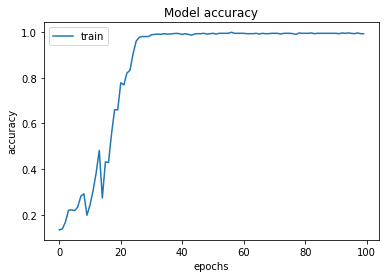

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

In [ ]:
model.save('bai1.h5')
model_CNN=load_model('bai1.h5')

Text(0.5, 1.0, 'Model dự đoán là: Bun bo')

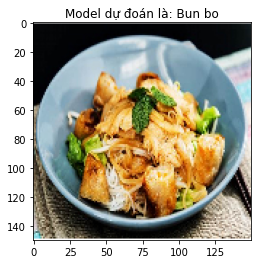

In [ ]:
hinh=["Cha cua", "Cha muc", "Cha gio", "Cha lua", "Gio tai", "Cha que", "Bun bo", "Cha hoa ngu sac", "Gio thu", "Thit da bao"]
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img('drive/MyDrive/Tri tue nhan tao/Food/Test/1.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=(img.reshape(1,150,150,3))
img=img/255
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(img))]))

Text(0.5, 1.0, 'Model dự đoán là: Gio thu')

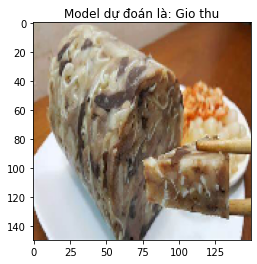

In [ ]:
hinh=["Cha cua", "Cha muc", "Cha gio", "Cha lua", "Gio tai", "Cha que", "Bun bo", "Cha hoa ngu sac", "Gio thu", "Thit da bao"]
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img('drive/MyDrive/Tri tue nhan tao/Food/Test/2.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=(img.reshape(1,150,150,3))
img=img/255
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(img))]))

Text(0.5, 1.0, 'Model dự đoán là: Thit da bao')

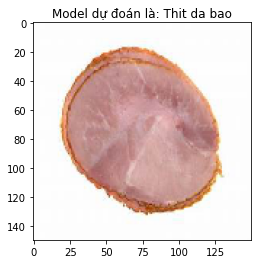

In [ ]:
hinh=["Cha cua", "Cha muc", "Cha gio", "Cha lua", "Gio tai", "Cha que", "Bun bo", "Cha hoa ngu sac", "Gio thu", "Thit da bao"]
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img('drive/MyDrive/Tri tue nhan tao/Food/Test/3.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=(img.reshape(1,150,150,3))
img=img/255
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(img))]))

Text(0.5, 1.0, 'Model dự đoán là: Cha hoa ngu sac')

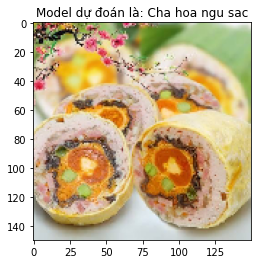

In [ ]:
hinh=["Cha cua", "Cha muc", "Cha gio", "Cha lua", "Gio tai", "Cha que", "Bun bo", "Cha hoa ngu sac", "Gio thu", "Thit da bao"]
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img('drive/MyDrive/Tri tue nhan tao/Food/Test/4.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=(img.reshape(1,150,150,3))
img=img/255
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(img))]))

# BÀI 2: NHẬN DẠNG 10 LOẠI TRÁI CÂY NHIỆT ĐỚI

In [ ]:
import os
from PIL import Image
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD

from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [ ]:
dick={"Pear Red":[1,0,0,0,0,0,0,0,0,0],"Kiwi":[0,1,0,0,0,0,0,0,0,0],
      "Cherry Rainier":[0,0,1,0,0,0,0,0,0,0],"Cactus fruit":[0,0,0,1,0,0,0,0,0,0],
      "Blueberry":[0,0,0,0,1,0,0,0,0,0],"Beetroot":[0,0,0,0,0,1,0,0,0,0],
      "Banana":[0,0,0,0,0,0,1,0,0,0],"Avocado":[0,0,0,0,0,0,0,1,0,0],
      "Apricot":[0,0,0,0,0,0,0,0,1,0],"Apple Braeburn":[0,0,0,0,0,0,0,0,0,1]}

In [ ]:
def getData(dirData, x):
  for i in os.listdir(dirData):
    i_path=os.path.join(dirData,i) 
    lst=[]  
    for j in os.listdir(i_path):
      j_path=os.path.join(i_path,j) 
      label=j_path.split('/')[5]
      img=np.array(Image.open(j_path))
      lst.append((img,dick[label])) 
    x.extend(lst) 
  return x

In [ ]:
train='drive/MyDrive/Tri tue nhan tao/Fruit/train'
test='drive/MyDrive/Tri tue nhan tao/Fruit/test'
validation='drive/MyDrive/Tri tue nhan tao/Fruit/validation'

x_train=[]
x_test=[]
x_validation=[]

y_train=[]
y_test=[]
y_validation=[]

x_train=getData(train,x_train)
x_test=getData(test,x_test)
x_validation=getData(validation,x_validation)

for i in range (0,3):
  np.random.shuffle(x_train)

print(len(x_train))
print(len(x_test))
print(len(x_validation))

2059
2059
2059


In [ ]:
x_train_1=np.array([x[0] for _, x in enumerate(x_train)])
y_train=np.array([x[1] for _, x in enumerate(x_train)])

x_test_1=np.array([x[0] for _, x in enumerate(x_test)])
y_test=np.array([x[1] for _, x in enumerate(x_test)])

x_validation_1=np.array([x[0] for _, x in enumerate(x_validation)])
y_validation=np.array([x[1] for _, x in enumerate(x_validation)])

x_pred=x_test_1
y_pred=y_test

x_train_1=x_train_1.astype('float32')
x_test_1=x_test_1.astype('float32')
x_validation_1=x_validation_1.astype('float32')

x_train_1/=255
x_test_1/=255
x_validation_1/=255

print(x_train_1.shape)
print(x_test_1.shape)
print(x_validation_1.shape)

(2059, 100, 100, 3)
(2059, 100, 100, 3)
(2059, 100, 100, 3)


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_1,y_train,epochs=10,batch_size=128,validation_data=(x_validation_1,y_validation),verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/10
17/17 [==============================] - 6s 337ms/step - loss: 8.7828 - accuracy: 0.3254 - val_loss: 2.2522 - val_accuracy: 0.3191
Epoch 2/10
17/17 [==============================] - 5s 305ms/step - loss: 0.8623 - accuracy: 0.7392 - val_loss: 0.3010 - val_accuracy: 0.8708
Epoch 3/10
17/17 [==============================] - 5s 305ms/step - loss: 0.1655 - accuracy: 0.9422 - val_loss: 0.0364 - val_accuracy: 0.9971
Epoch 4/10
17/17 [==============================] - 5s 306ms/step - loss: 0.0335 - accuracy: 0.9908 - val_loss: 0.0051 - val_accuracy: 0.9995
Epoch 5/10
17/17 [==============================] - 5s 307ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 5s 307ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 9.7819e-04 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 5s 307ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 5.6429e-04 - val_accuracy: 1.000

In [ ]:
Score=model.evaluate(x_test_1,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.0001893027510959655
Test accuary 1.0


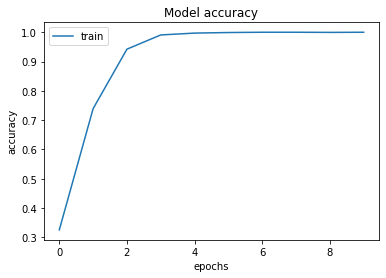

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

In [ ]:
model.save('bai2.h5')
model_CNN=load_model('bai2.h5')

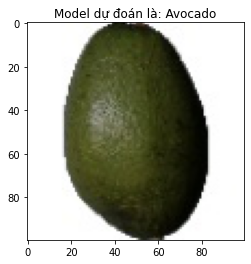

In [ ]:
hinh=["Pear Red", "Kiwi", "Cherry Rainier", "Cactus fruit", "Blueberry", "Beetroot", "Banana", "Avocado", "Apricot", "Apple Braeburn"]

plt.imshow(x_pred[10], cmap='binary')
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(x_pred[10].reshape((-1,100,100,3))))]))
plt.show()

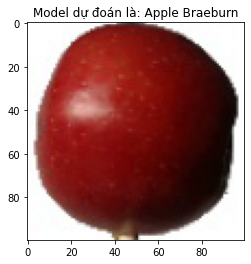

In [ ]:
hinh=["Pear Red", "Kiwi", "Cherry Rainier", "Cactus fruit", "Blueberry", "Beetroot", "Banana", "Avocado", "Apricot", "Apple Braeburn"]

plt.imshow(x_pred[400], cmap='binary')
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(x_pred[400].reshape((-1,100,100,3,))))]))
plt.show()

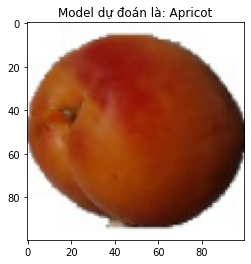

In [ ]:
hinh=["Pear Red", "Kiwi", "Cherry Rainier", "Cactus fruit", "Blueberry", "Beetroot", "Banana", "Avocado", "Apricot", "Apple Braeburn"]

plt.imshow(x_pred[150], cmap='binary')
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(x_pred[150].reshape((-1,100,100,3,))))]))
plt.show()

# BÀI 3: NHẬN DẠNG 11 LOẠI TỜ TIỀN GIẤY VIỆT NAM

In [2]:
import os
from PIL import Image
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD

from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [3]:
dick={"200":[1,0,0,0,0,0,0,0,0,0,0],"500":[0,1,0,0,0,0,0,0,0,0,0],
      "1000":[0,0,1,0,0,0,0,0,0,0,0],"2000":[0,0,0,1,0,0,0,0,0,0,0],
      "5000":[0,0,0,0,1,0,0,0,0,0,0],"10k":[0,0,0,0,0,1,0,0,0,0,0],
      "20k":[0,0,0,0,0,0,1,0,0,0,0],"50k":[0,0,0,0,0,0,0,1,0,0,0],
      "100k":[0,0,0,0,0,0,0,0,1,0,0],"200k":[0,0,0,0,0,0,0,0,0,1,0],
      "500k":[0,0,0,0,0,0,0,0,0,0,1]}

In [4]:
def getData(dirData, x):
  for i in os.listdir(dirData):
    i_path=os.path.join(dirData,i) 
    lst=[]  
    for j in os.listdir(i_path):
      j_path=os.path.join(i_path,j) 
      label=j_path.split('/')[5]
      img=Image.open(j_path)
      img=np.array(img.resize((150,150),Image.ANTIALIAS))
      lst.append((img,dick[label])) 
    x.extend(lst) 
  return x

In [24]:
train='drive/MyDrive/Tri tue nhan tao/Money/train'
test='drive/MyDrive/Tri tue nhan tao/Money/test'
validation='drive/MyDrive/Tri tue nhan tao/Money/validation'

x_train=[]
x_test=[]
x_validation=[]

y_train=[]
y_test=[]
y_validation=[]

x_train=getData(train,x_train)
x_test=getData(test,x_test)
x_validation=getData(validation,x_validation)

for i in range (0,3):
  np.random.shuffle(x_train)

print(len(x_train))
print(len(x_test))
print(len(x_validation))

661
11
110


In [25]:
x_train_1=np.array([x[0] for _, x in enumerate(x_train)])
y_train=np.array([x[1] for _, x in enumerate(x_train)])

x_test_1=np.array([x[0] for _, x in enumerate(x_test)])
y_test=np.array([x[1] for _, x in enumerate(x_test)])

x_validation_1=np.array([x[0] for _, x in enumerate(x_validation)])
y_validation=np.array([x[1] for _, x in enumerate(x_validation)])

x_pred=x_test_1
y_pred=y_test

x_train_1=x_train_1.astype('float32')
x_test_1=x_test_1.astype('float32')
x_validation_1=x_validation_1.astype('float32')

x_train_1/=255
x_test_1/=255
x_validation_1/=255

print(x_train_1.shape)
print(x_test_1.shape)
print(x_validation_1.shape)

(661, 150, 150, 3)
(11, 150, 150, 3)
(110, 150, 150, 3)


In [26]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(11,activation='softmax'))

In [27]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_1,y_train,epochs=500,batch_size=128,validation_data=(x_validation_1,y_validation),verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
6/6 [==============================] - 4s 575ms/step - loss: 6.2357 - accuracy: 0.0787 - val_loss: 2.3944 - val_accuracy: 0.0909
Epoch 2/500
6/6 [==============================] - 3s 534ms/step - loss: 2.3969 - accuracy: 0.0968 - val_loss: 2.3773 - val_accuracy: 0.1091
Epoch 3/500
6/6 [==============================] - 3s 535ms/step - loss: 2.3800 - accuracy: 0.1286 - val_loss: 2.3682 - val_accuracy: 0.1636
Epoch 4/500
6/6 [==============================] - 3s 535ms/step - loss: 2.3452 - accuracy: 0.1906 - val_loss: 2.2969 - val_accuracy: 0.1455
Epoch 5/500
6/6 [==============================] - 3s 537ms/step - loss: 2.2873 - accuracy: 0.1725 - val_loss: 2.2738 - val_accuracy: 0.1091
Epoch 6/500
6/6 [==============================] - 3s 534ms/step - loss: 2.2662 - accuracy: 0.1982 - val_loss: 2.2336 - val_accuracy: 0.2455
Epoch 7/500
6/6 [==============================] - 3s 539ms/step - loss: 2.1803 - accuracy: 0.2073 - val_loss: 2.3599 - val_accuracy: 0.1636
Epoch 8/500
6

In [28]:
Score=model.evaluate(x_test_1,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 6.407412528991699
Test accuary 0.3636363744735718


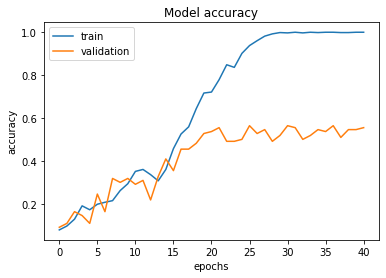

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.show()

In [30]:
model.save('bai3.h5')
model_CNN=load_model('bai3.h5')

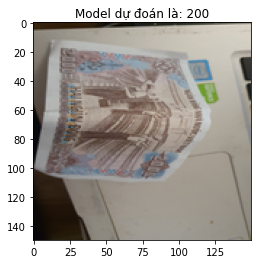

In [31]:
hinh=["200", "500", "1000", "2000", "5000", "10k", "20k", "50k", "100k", "200k", "500k"]

plt.imshow(x_pred[10], cmap='binary')
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(x_pred[10].reshape((-1,150,150,3,))))]))
plt.show()

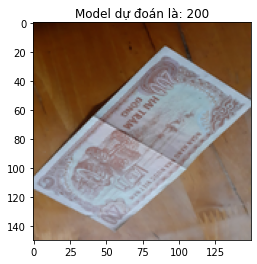

In [32]:
hinh=["200", "500", "1000", "2000", "5000", "10k", "20k", "50k", "100k", "200k", "500k"]

plt.imshow(x_pred[2], cmap='binary')
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(x_pred[2].reshape((-1,150,150,3,))))]))
plt.show()

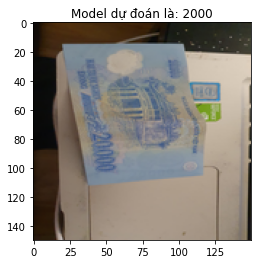

In [33]:
hinh=["200", "500", "1000", "2000", "5000", "10k", "20k", "50k", "100k", "200k", "500k"]

plt.imshow(x_pred[5], cmap='binary')
plt.title("Model dự đoán là: " + str(hinh[np.argmax(model_CNN.predict(x_pred[5].reshape((-1,150,150,3,))))]))
plt.show()